# IBM HR Employee Attrition
#### @ Author - Mohammed
**** [Website](https://datascience52.wordpress.com/) | [Github](https://github.com/mmd52) | [LinkedIn](https://www.linkedin.com/in/mohammedtopiwalla) ****

### ANN Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| ANN | 85.86% | 0.33 | 0.64 |

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Unnamed: 0                           1470 non-null int64
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
del df['Unnamed: 0']

In [5]:
df.shape

(1470, 51)

### Breaking Data into 70% Training and 30% Testing

In [42]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75,random_state=52)
train, val = sklearn.cross_validation.train_test_split(train, train_size = 0.75,random_state=52)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


In [49]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the train set
X_val = scaler.transform(x_val)

# Scale the test set
X_test = scaler.transform(x_test)

In [50]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(32,kernel_initializer='uniform', activation='relu', input_shape=(50,)))

model.add(Dense(8,kernel_initializer='uniform', activation='relu'))

# Add an output layer 
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
mod=model.fit(X_train, y_train,epochs=20, batch_size=32, verbose=1,validation_data=(X_val,y_val))

Train on 826 samples, validate on 276 samples
Epoch 1/20
826/826 [==============================] - 1s 1ms/step - loss: 0.6862 - acc: 0.8257 - val_loss: 0.6774 - val_acc: 0.8297
Epoch 2/20
826/826 [==============================] - 0s 102us/step - loss: 0.6593 - acc: 0.8378 - val_loss: 0.6362 - val_acc: 0.8297
Epoch 3/20
826/826 [==============================] - 0s 92us/step - loss: 0.5862 - acc: 0.8378 - val_loss: 0.5461 - val_acc: 0.8297
Epoch 4/20
826/826 [==============================] - 0s 90us/step - loss: 0.4682 - acc: 0.8378 - val_loss: 0.4562 - val_acc: 0.8297
Epoch 5/20
826/826 [==============================] - 0s 93us/step - loss: 0.3811 - acc: 0.8378 - val_loss: 0.4270 - val_acc: 0.8297
Epoch 6/20
826/826 [==============================] - 0s 91us/step - loss: 0.3433 - acc: 0.8378 - val_loss: 0.4233 - val_acc: 0.8297
Epoch 7/20
826/826 [==============================] - 0s 85us/step - loss: 0.3271 - acc: 0.8378 - val_loss: 0.4226 - val_acc: 0.8297
Epoch 8/20
826/826 [===

In [52]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

368/368 [==============================] - 0s 45us/step
[0.3555431936098182, 0.8586956521739131]


In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred[:5]

array([[0.00239927],
       [0.02987245],
       [0.0920174 ],
       [0.37713447],
       [0.0018538 ]], dtype=float32)

In [55]:
y_p=list()
for i in y_pred:
    if i>0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [56]:
y_test[:5]

1182    0
302     0
1279    1
291     0
1217    0
Name: Attrition, dtype: int64

In [57]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_p)


array([[298,  14],
       [ 38,  18]], dtype=int64)

### End Evaluation Metrics

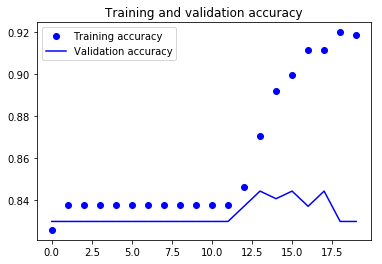

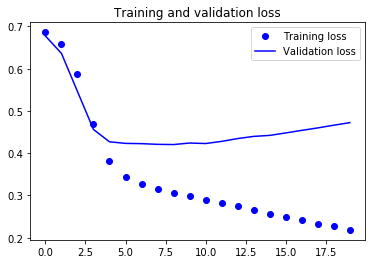

In [58]:
accuracy = mod.history['acc']
val_accuracy = mod.history['val_acc']
loss = mod.history['loss']
val_loss = mod.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [60]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "Found %d correct labels" % len(correct))

Found 312 correct labels


In [61]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 56 incorrect labels


In [62]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.85      1.00      0.92       312
    Class 1       0.00      0.00      0.00        56

avg / total       0.72      0.85      0.78       368



ROC AUC: 0.64


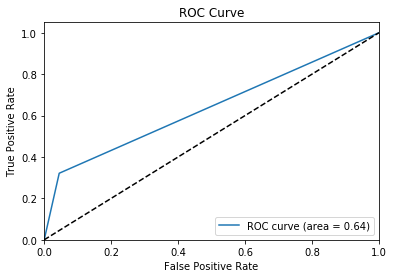

In [63]:
fpr, tpr, _ = roc_curve(y_test, y_p)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_p)

0.3355555555555555

In [65]:
# F1 score
f1_score(y_test,y_p)

0.40909090909090917